In [2]:
import gspread
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import plotly.graph_objs as go

warnings.filterwarnings("ignore")

filename = 'service_account.json'

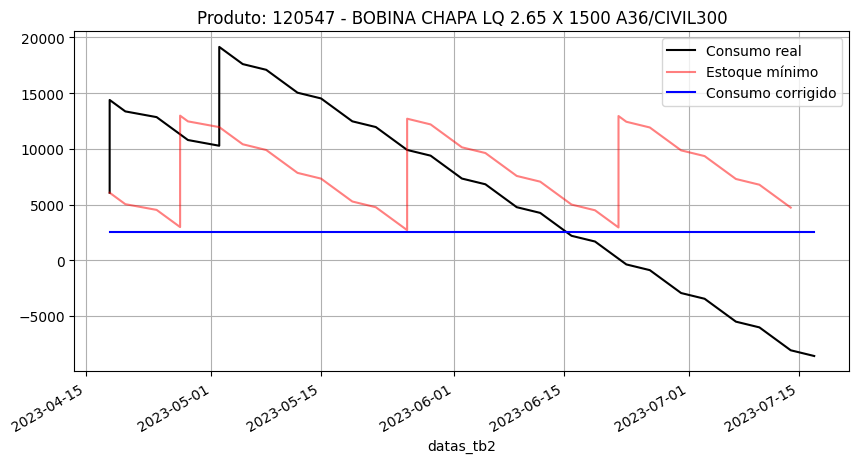

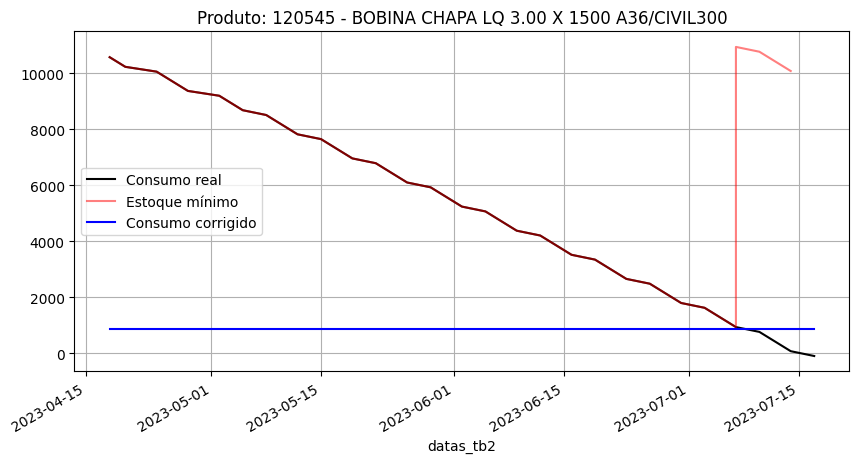

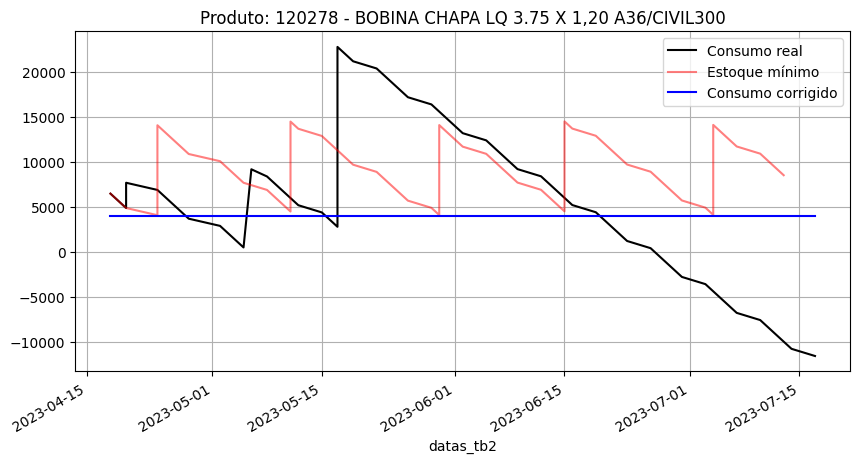

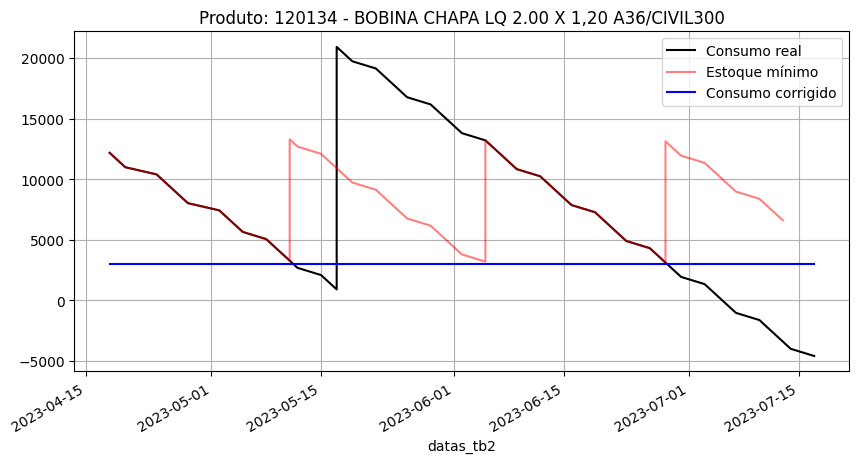

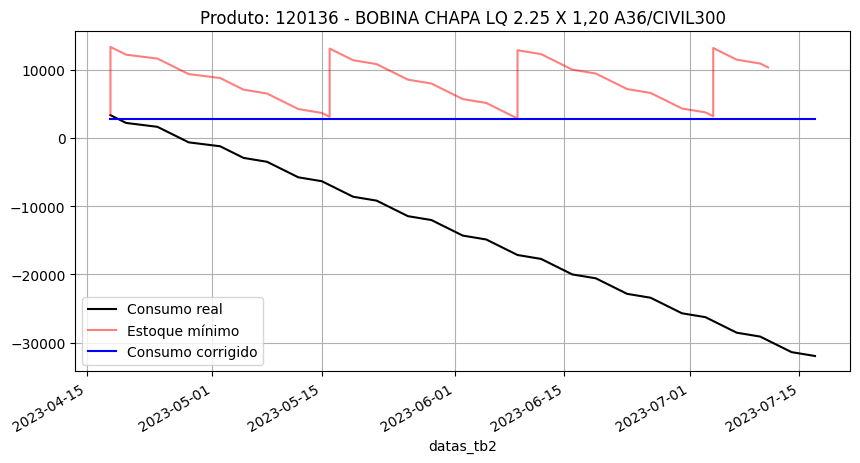

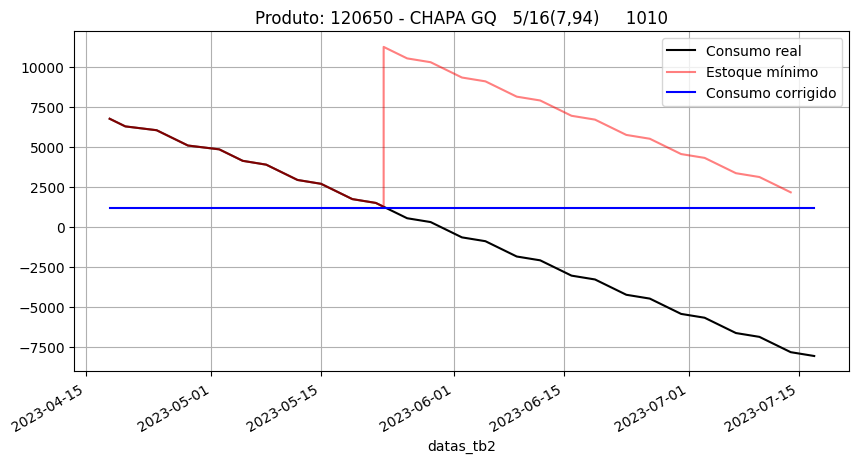

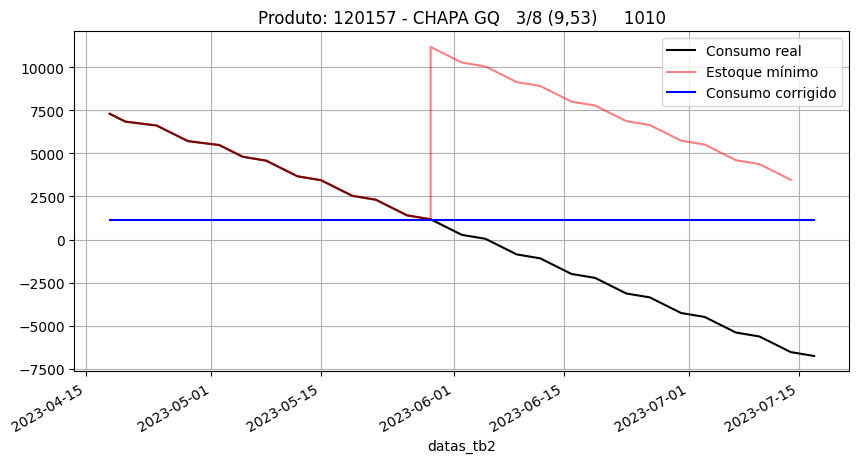

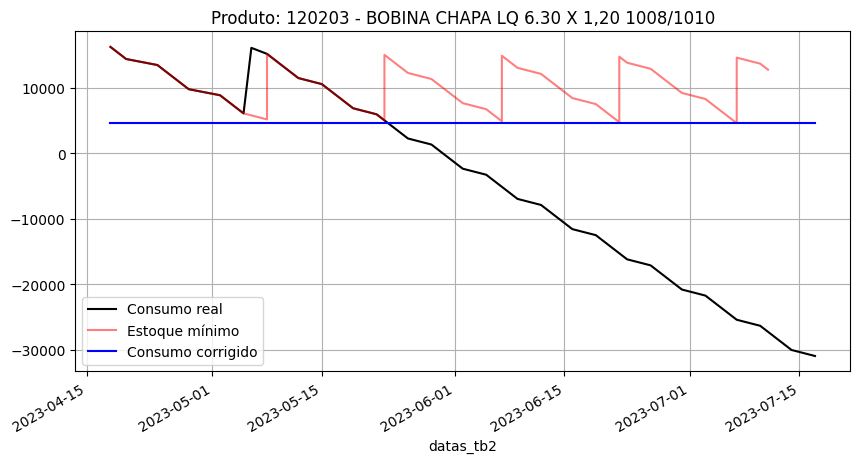

In [49]:
## Conectando com google sheets e acessando planilha

sheet = 'Análise Previsão de Consumo (CMM / NTP ) DEE'
worksheet = 'testesGraficos'

sa = gspread.service_account(filename)
sh = sa.open(sheet)
wks = sh.worksheet(worksheet)

produtos = pd.read_csv("produtos.csv", sep=';')

for produto in range(0,8):

    wks.update('AA2', produtos['ID'][produto])

    headers = wks.row_values(2)

    base = wks.get()
    base = pd.DataFrame(base)
    base = base.set_axis(headers, axis=1, inplace=False)[2:]

    ## Tratando planilha 

    base = base.iloc[:,5:15].dropna(axis=0)

    teste = base[['datas_tb2','saldo atual_tb2', 'estoque minimo_tb2', 'corrigido_tb2', 'data corrigida_tb2']]
    teste['datas_tb2'] = pd.to_datetime(teste['datas_tb2'], format='%d/%m/%Y')
    teste['data corrigida_tb2'] = pd.to_datetime(teste['data corrigida_tb2'], format='%d/%m/%Y')

    teste['saldo atual_tb2'] = teste['saldo atual_tb2'].apply(lambda x: float(x.replace('.', '').replace(',', '.')))
    teste['estoque minimo_tb2'] = teste['estoque minimo_tb2'].apply(lambda x: float(x.replace('.', '').replace(',', '.')))
    teste['corrigido_tb2'] = teste['corrigido_tb2'].apply(lambda x: float(x.replace('.', '').replace(',', '.')))

    teste['saldo atual_tb2'] = teste['saldo atual_tb2'].astype(float)

    desc = pd.DataFrame(teste.describe(include='all'))
    min = desc['datas_tb2'][4]
    max = desc['datas_tb2'][5]

    ## Plotando gráficos

    # plt.figure(figsize=(10,5))

    # plt.plot(teste['datas_tb2'],teste['saldo atual_tb2'], color='black')
    # plt.plot(teste['datas_tb2'],teste['estoque minimo_tb2'], color='blue')
    # plt.plot(teste['datas_tb2'],teste['corrigido_tb2'], alpha=0.5, color='red')

    # plt.title('Produto: ')# + produtos['ID'][produto])
    # plt.xlabel('Data')
    # plt.ylabel('Valores')
    # plt.grid(True)
    # plt.xlim(min, max)
    # plt.legend(["Consumo real", "Estoque mínimo", "Consumo corrigido"]) 
    # plt.show();

    titulo = 'Produto: ' + produtos['ID'][produto]

    fig, ax = plt.subplots()

    teste.plot(x='datas_tb2',y='saldo atual_tb2', ax=ax, color='black', title=titulo, figsize=(10,5))
    teste.plot(x='data corrigida_tb2',y='corrigido_tb2', ax=ax, color='red', alpha=0.5)
    teste.plot(x='datas_tb2',y='estoque minimo_tb2', ax=ax, color='blue')
    
    plt.grid(True)

    plt.legend(["Consumo real", "Consumo corrigido", "Estoque mínimo"]) 
    plt.show();
